# Lab 2: Simulation of Expectation Value

- Assume that an investor is considering whether or not to invest in a stock for one year.
- Let $Y$ represent the amount by which the price changes over the year with the following distribution:

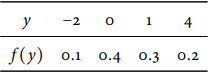

- Then the expected earning is $\mathbb{E}(Y) = 0.9.$

## Task 1: Drawing Samples from Specific Distribution

- Now you need to run a statistical simulation to check its expectation value.
- Write a function to draw samples following the specific distribution.
- Please implement the inverse transform algorithm (see the figure in the email).
    - Note that you need to convert the pdf to its cdf and apply the inverse tranform to it.

In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
          "figure.autolayout": True,
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'lines.linewidth': 4}

plt.rcParams.update(params)
%matplotlib inline

### Solution 1: By Loops

In [13]:
def rng(size = 1):

    x = scipy.stats.uniform().rvs(int(size))
    y = np.zeros((int(size), 1))
    for i in range(int(size)):
        if 0 < x[i] < 0.1:
            y[i] = -2
        elif 0.1 <= x[i] < 0.5:
            y[i] = 0
        elif 0.5 <= x[i] < 0.8:
            y[i] = 1
        elif 0.8 <= x[i] <= 1:
            y[i] = 4

    return y

### Solution 2: By numpy.random.choice()

In [16]:
def rng(size = 1):

    return np.random.choice([-2, 0, 1, 4], size = int(size), p = [0.1, 0.4, 0.3, 0.2])

## Task 2: Run Simulation to Calculate the Average for Expected Value

In [17]:
%%time

sample_sizes = np.round(np.linspace(1, 3000, 3000))
samples = [rng(s) for s in sample_sizes] # comprehension
means = list(map(np.mean, samples))

CPU times: user 530 ms, sys: 32.4 ms, total: 562 ms
Wall time: 558 ms


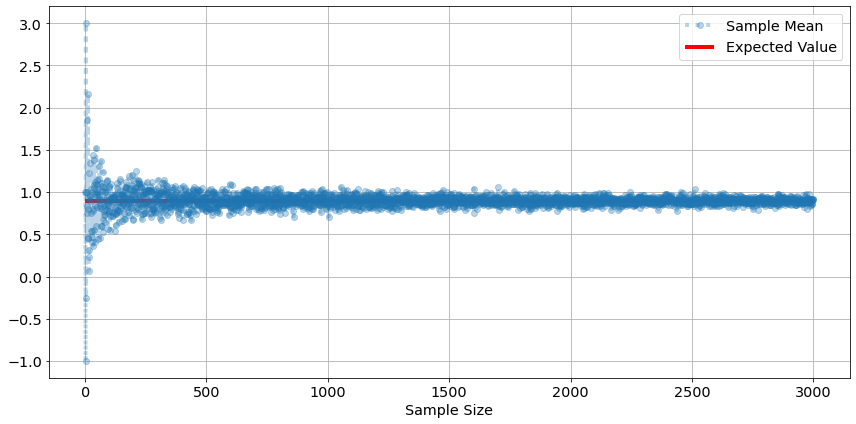

In [18]:
plt.figure(figsize = (12, 6))
plt.plot(sample_sizes, means, "o:", alpha = 0.3)
plt.hlines(0.9, np.min(sample_sizes), np.max(sample_sizes), "r")
plt.grid(True)
plt.xlabel("Sample Size")
plt.legend(["Sample Mean", "Expected Value"])